# Easy

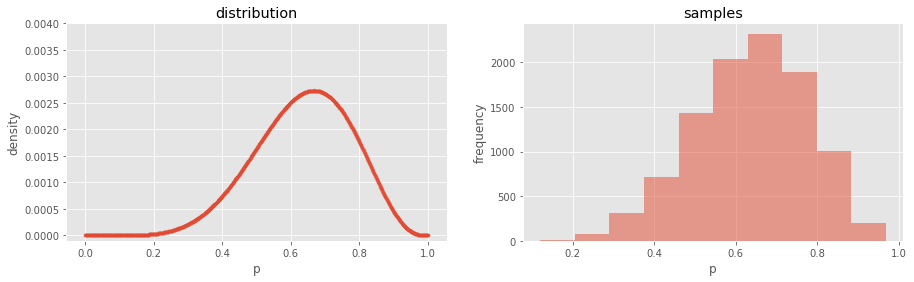

In [19]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


def grid_bin(n, W, T):
    grid = np.linspace(0, 1, n)
    prior = np.ones(n)
    likelihood = ss.binom(T, grid).pmf(W)
    posterior = likelihood * prior
    posterior = posterior / posterior.sum()
    return posterior, grid

posterior, grid = grid_bin(1000, 6, 9)
samples = np.random.choice(grid, 10000, replace=True, p=posterior)

f, axarr = plt.subplots(1, 2)
f.set_figwidth(15)
axarr[0].scatter(grid, posterior, s=10, alpha=0.5)
axarr[0].set_ylim([-0.0001, 0.004])
axarr[0].set_xlabel('p')
axarr[0].set_ylabel('density')
axarr[0].set_title('distribution')
axarr[1].hist(samples, alpha=0.5)
axarr[1].set_xlabel('p')
axarr[1].set_ylabel('frequency')
axarr[1].set_title('samples')

In [2]:
# 3E1:
(samples < 0.2).mean()

0.0011999999999999999

In [3]:
# 3E2:
(samples > 0.8).mean()

0.1212

In [4]:
# 3E3:
((samples > 0.2) & (samples < 0.8)).mean()

0.87760000000000005

In [5]:
# 3E4:
np.percentile(samples, 20)

0.51631631631631647

In [6]:
# 3E5:
np.percentile(samples, 80)

0.76076076076076071

In [26]:
# 3E6:
import pymc
pymc.utils.hpd(samples, 0.34)

array([ 0.42842843,  0.65265265])

In [8]:
# 3E7:
np.percentile(samples, 17), np.percentile(samples, 83)

(0.49649649649649652, 0.77577577577577572)

# Medium

(-0.0001, 0.004)

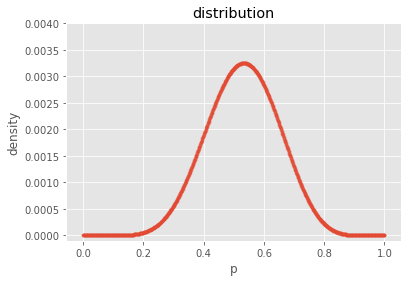

In [20]:
# 3M1:

posterior, grid = grid_bin(1000, 8, 15)
plt.scatter(grid, posterior, s=10, alpha=0.5)
plt.xlabel('p')
plt.ylabel('density')
plt.title('distribution')
plt.ylim([-0.0001, 0.004])

array([ 0.33233233,  0.72172172])

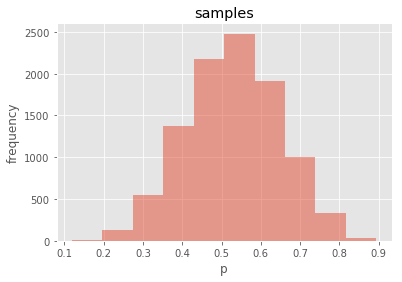

In [27]:
# 3M2:

# Take samples:
samples = np.random.choice(grid, 10000, replace=True, p=posterior)

plt.hist(samples, alpha=0.5)
plt.xlabel('p')
plt.ylabel('frequency')
plt.title('samples')

pymc.utils.hpd(samples, 0.1)

In [ ]:
# 3M3: